<a href="https://colab.research.google.com/github/IndeewaAmarasinghe/DL_Assignment/blob/main/CNN_for_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/Reviews.csv')

# Preprocessing: Using only review text and sentiment
data = data[['Text', 'Score']]
data['Sentiment'] = data['Score'].apply(lambda x: 1 if x > 3 else 0)  # Positive (4, 5) = 1, Negative (1, 2) = 0

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['Text'])
sequences = tokenizer.texts_to_sequences(data['Text'])

# Define the maximum sequence length
maxlen = 100

X = pad_sequences(sequences, maxlen=maxlen)
y = data['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the CNN model
model = Sequential()

# Embedding layer (input_dim = size of vocabulary, output_dim = embedding size)
model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))

# 1D Convolution layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))

# Max Pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.7560 - loss: 0.5471 - val_accuracy: 0.8150 - val_loss: 0.3855
Epoch 2/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.8668 - loss: 0.3051 - val_accuracy: 0.8486 - val_loss: 0.3425
Epoch 3/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9332 - loss: 0.1798 - val_accuracy: 0.8437 - val_loss: 0.4327
Epoch 4/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9640 - loss: 0.1135 - val_accuracy: 0.8321 - val_loss: 0.6900
Epoch 5/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.9847 - loss: 0.0585 - val_accuracy: 0.8449 - val_loss: 0.6364
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8431 - loss: 0.6349
Accuracy: 84.49%


In [4]:
!pip install tensorflow


Data Visualization Code

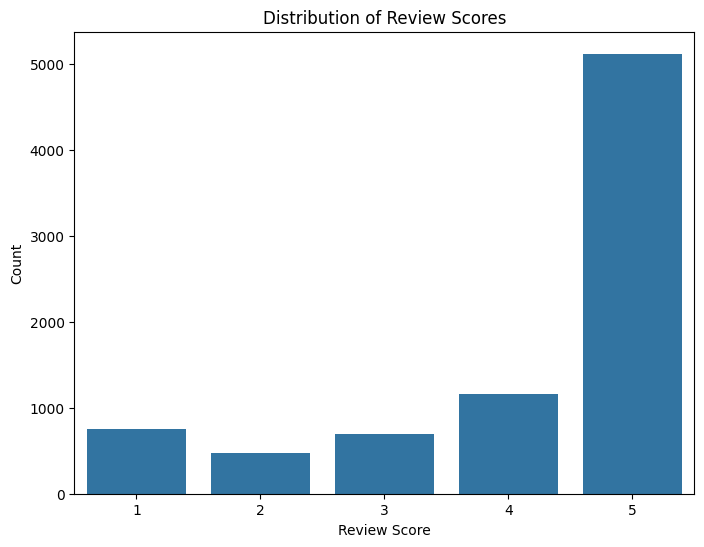

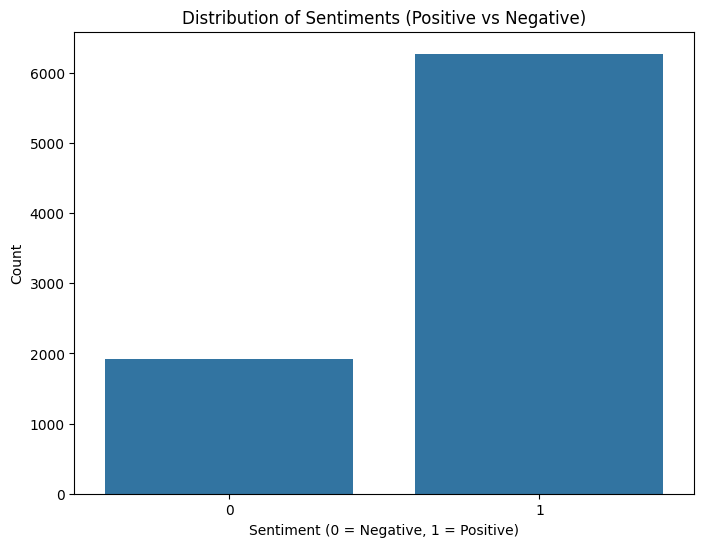

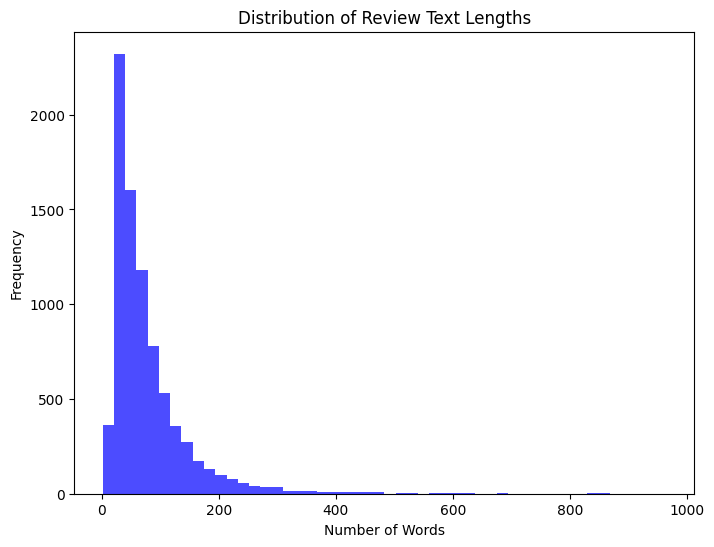

Epoch 1/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.9923 - loss: 0.0425 - val_accuracy: 0.8431 - val_loss: 0.7557
Epoch 2/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.9954 - loss: 0.0284 - val_accuracy: 0.8333 - val_loss: 0.9621
Epoch 3/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9958 - loss: 0.0259 - val_accuracy: 0.8431 - val_loss: 0.8456
Epoch 4/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.9982 - loss: 0.0233 - val_accuracy: 0.8346 - val_loss: 1.1590
Epoch 5/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9959 - loss: 0.0260 - val_accuracy: 0.8333 - val_loss: 0.9717


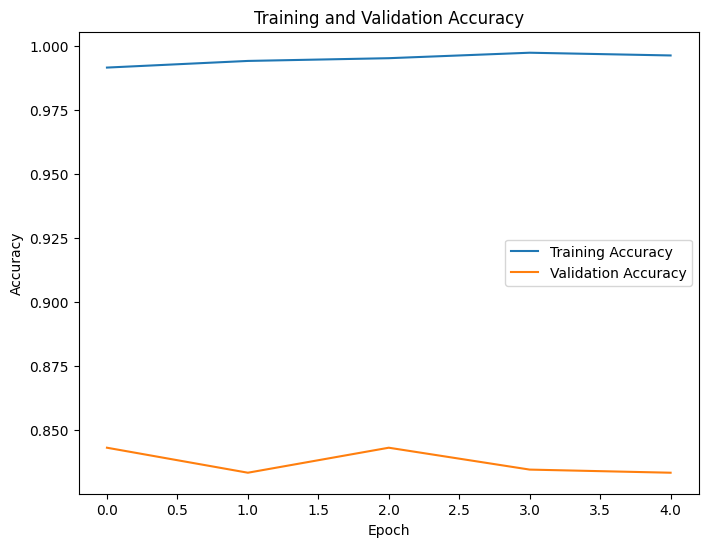

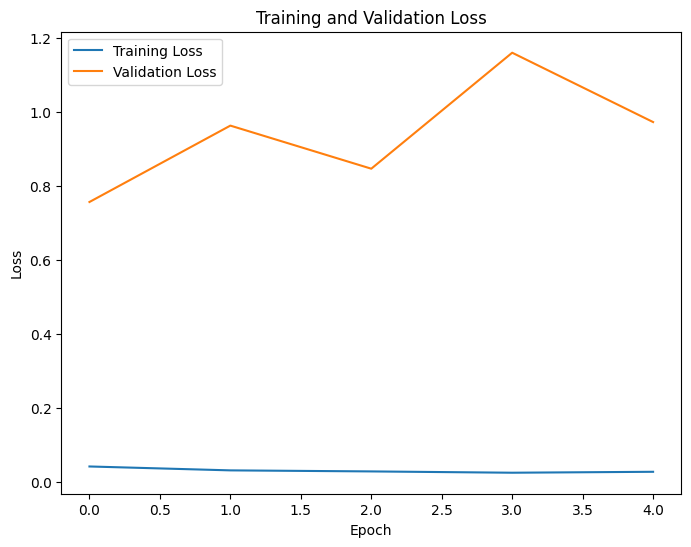

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of review scores
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=data)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# 2. Distribution of Sentiment Labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data)
plt.title('Distribution of Sentiments (Positive vs Negative)')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

# 3. Review text length distribution
data['Review_Length'] = data['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
plt.hist(data['Review_Length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# 4. Model training history (Accuracy and Loss)
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Plotting training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Train the model

Epoch 1/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.9977 - loss: 0.0237 - val_accuracy: 0.8352 - val_loss: 1.0865
Epoch 2/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9999 - loss: 0.0150 - val_accuracy: 0.8352 - val_loss: 1.3037
Epoch 3/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9994 - loss: 0.0138 - val_accuracy: 0.8346 - val_loss: 1.3016
Epoch 4/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9993 - loss: 0.0154 - val_accuracy: 0.8400 - val_loss: 1.5010
Epoch 5/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.9972 - loss: 0.0213 - val_accuracy: 0.8230 - val_loss: 1.3316
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8117 - loss: 1.3522
Accuracy: 82.30%
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Classification Report:

              precision    recall  f1-score   support

    Negative       0.64      0.58      0.61       389
    Positive       0.87      0.90      0.89      1249

    accuracy                       

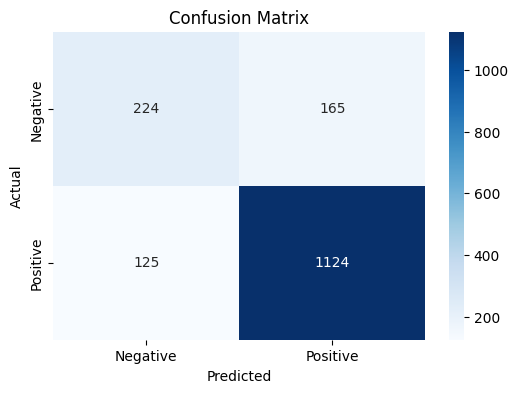

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Predict sentiment on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report (precision, recall, F1-score)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Test the model

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Review: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Predicted Sentiment: Positive
Actual Sentiment: Positive

Review: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
Predicted Sentiment: Positive
Actual Sentiment: Positive

Review: This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.

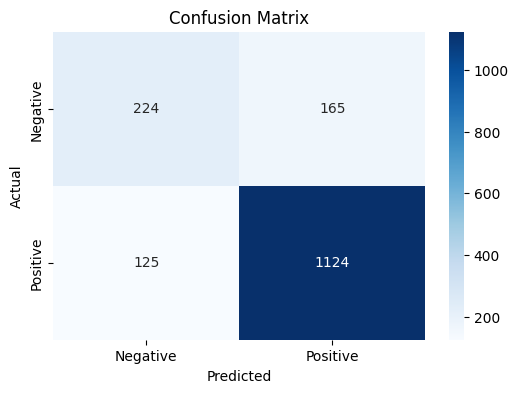

In [7]:
# Predict the sentiment for the test set
y_pred_probs = model.predict(X_test)  # Returns probabilities

# Convert probabilities to binary values (0 = Negative, 1 = Positive)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Display the first 10 predictions and the corresponding actual sentiments
for i in range(10):
    print(f"Review: {data['Text'].iloc[i]}")
    print(f"Predicted Sentiment: {'Positive' if y_pred[i][0] == 1 else 'Negative'}")
    print(f"Actual Sentiment: {'Positive' if y_test.iloc[i] == 1 else 'Negative'}\n")

# Evaluate accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Display classification report for precision, recall, and F1-score
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion matrix to show performance visually
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Code for Real-World Testing

In [9]:
# New unseen reviews for testing (you can replace these with real reviews)
new_reviews = [
    "This product was absolutely amazing! Loved it.",
    "I hated this product, it was terrible.",
    "The quality is okay, not too bad but not great either.",
    "Really fast delivery.",
    "Fantastic product, I will buy again!",
    "Not worth the price at all."
]

# Preprocess the new reviews (tokenize and pad them just like in training)
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_data = pad_sequences(new_sequences, maxlen=maxlen)

# Predict sentiment on new data
new_predictions_probs = model.predict(new_data)
new_predictions = (new_predictions_probs > 0.5).astype("int32")

# Print the results
for i, review in enumerate(new_reviews):
    predicted_sentiment = "Positive" if new_predictions[i][0] == 1 else "Negative"
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predicted_sentiment}")
    print(f"Prediction Probability: {new_predictions_probs[i][0]:.2f}\n")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Review: This product was absolutely amazing! Loved it.
Predicted Sentiment: Positive
Prediction Probability: 1.00

Review: I hated this product, it was terrible.
Predicted Sentiment: Negative
Prediction Probability: 0.25

Review: The quality is okay, not too bad but not great either.
Predicted Sentiment: Negative
Prediction Probability: 0.01

Review: Really fast delivery.
Predicted Sentiment: Positive
Prediction Probability: 1.00

Review: Fantastic product, I will buy again!
Predicted Sentiment: Positive
Prediction Probability: 1.00

Review: Not worth the price at all.
Predicted Sentiment: Negative
Prediction Probability: 0.36

